### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [3]:
dataset = pd.read_csv('heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Data Preprocessing

In [4]:
# checking missing values
missing_values = dataset.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# separating x(independent variable) from dataset.
x = dataset.iloc[:,:-1].values
x_df = pd.DataFrame(x, columns=dataset.columns[:-1])
print(x_df)

       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1     53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2     70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3     61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4     62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  59.0  1.0  1.0     140.0  221.0  0.0      1.0    164.0    1.0      0.0   
1021  60.0  1.0  0.0     125.0  258.0  0.0      0.0    141.0    1.0      2.8   
1022  47.0  1.0  0.0     110.0  275.0  0.0      0.0    118.0    1.0      1.0   
1023  50.0  0.0  0.0     110.0  254.0  0.0      0.0    159.0    0.0      0.0   
1024  54.0  1.0  0.0     120.0  188.0  0.0      1.0    113.0    0.0      1.4   

      slope   ca  thal  
0       2.0  2

In [6]:
# separating y(target value) from dataset
y = dataset.iloc[:,-1].values
y_df = pd.DataFrame(y, columns=["target"])
print(y_df)

      target
0          0
1          0
2          0
3          0
4          0
...      ...
1020       1
1021       0
1022       0
1023       1
1024       0

[1025 rows x 1 columns]


### Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_sc_df = pd.DataFrame(x, columns=dataset.columns[:-1])
print(x_sc_df)

           age       sex        cp  trestbps      chol       fbs   restecg  \
0    -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1    -0.158157  0.661504 -0.915755  0.479107 -0.833861  2.387330 -1.004049   
2     1.716595  0.661504 -0.915755  0.764688 -1.396233 -0.418878  0.891255   
3     0.724079  0.661504 -0.915755  0.936037 -0.833861 -0.418878  0.891255   
4     0.834359 -1.511706 -0.915755  0.364875  0.930822  2.387330  0.891255   
...        ...       ...       ...       ...       ...       ...       ...   
1020  0.503520  0.661504  0.055931  0.479107 -0.484803 -0.418878  0.891255   
1021  0.613800  0.661504 -0.915755 -0.377636  0.232705 -0.418878 -1.004049   
1022 -0.819834  0.661504 -0.915755 -1.234378  0.562371 -0.418878 -1.004049   
1023 -0.488996 -1.511706 -0.915755 -1.234378  0.155137 -0.418878 -1.004049   
1024 -0.047877  0.661504 -0.915755 -0.663216 -1.124743 -0.418878  0.891255   

       thalach     exang   oldpeak     slope        ca      tha

### Train Test split

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2)

In [9]:
len(X_train) , len(X_test) , len(Y_train) , len(Y_test) 

(820, 205, 820, 205)

### Compiling Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(
    min_samples_leaf=5,
    random_state=42,
)
random_forest.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(Y_test , y_pred)
print("Accuracy Of Random Forest Model: ",accuracy)

Accuracy Of Random Forest Model:  0.9414634146341463


### Confusion matrix and classification report

<function matplotlib.pyplot.show(close=None, block=None)>

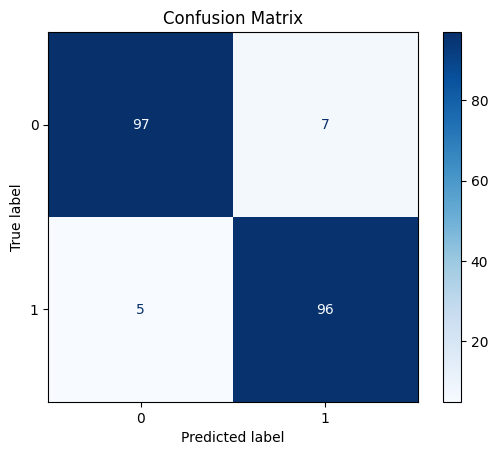

In [12]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
cm = confusion_matrix(Y_test , y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [0 , 1])
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show

In [13]:
report = classification_report(Y_test , y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       104
           1       0.93      0.95      0.94       101

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



### Saving model

In [14]:
import joblib
joblib.dump(random_forest , 'random_forest_model')

['random_forest_model']

### Making single prediction

In [15]:
new_data = pd.DataFrame({
    'age':66,
    'sex':0,
    'cp':2,
    'trestbps':146,
    'chol':278,
    'fbs':0,
    'restecg':0,
    'thalach':152,
    'exang':0,
    'oldpeak':0,
     'slope':1,
    'ca':1,
    'thal':2,    
},index=[0])

In [16]:
new_data = sc.fit_transform(new_data)
print(new_data)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
p = random_forest.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

Disease
